# Abstarct

Stakeholders at a Charter School Network would like to know if there is a pay inequity amongst school based staff compared to support staff as well as other financial and talent metrics, e.g. typical salary, length of employment, etc.

## Objective 

The FY 24 Salary Analysis seeks to answer the following questions:

1. What is the typical salary at the charter school network?
2. What is the typical length of employment?
3. Is there an equitable pay scale between school based and Home Office Staff?

In [1]:
#Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
#Importing salary,length of employment, and campus data

# https://docs.google.com/spreadsheets/d/1OjyBdsyUS580Ku83uadnOUV4sRHQIBOuHLLmgeW4EVk/edit#gid=72198648

sheet_id = '1OjyBdsyUS580Ku83uadnOUV4sRHQIBOuHLLmgeW4EVk' # <- creating sheet id object
xls = pd.ExcelFile(f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=xlsx') #<- creating xls object 
df = pd.read_excel(xls,'Remaining Salaries') # <- importing sheet using xls object
df1 = pd.read_csv(f'/Users/scipio/Downloads/FY 24 Position Control - Position Control Sheet Mar.csv', parse_dates = ['Start Date'])
df2 = pd.read_csv(f'/Users/scipio/Downloads/Position_ID_March.csv') # <- Employee Campus Data
df1 = df1[['Position ID','Start Date','Contract Type']] # <- subsetting dataset
coverage_pay = pd.read_csv(f'/Users/scipio/Downloads/March Coverage Pay Totals.csv')
df = df.merge(df1, on = 'Position ID', how = 'left')\
    .merge(df2, left_on = 'Position ID', right_on = 'Position_ID', how = 'left')\
    .merge(coverage_pay, on ='Position ID', how = 'left')# <- merging datasets on the Position ID column

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255 entries, 0 to 254
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Position ID              255 non-null    object        
 1   Legal First Name         255 non-null    object        
 2   Legal Last Name          255 non-null    object        
 3   Annual Salary Amount     241 non-null    float64       
 4   Regular Pay Rate Amount  255 non-null    float64       
 5   Unnamed: 5               248 non-null    float64       
 6   Hourly Adjustment        255 non-null    int64         
 7   Remaining Pay Periods    255 non-null    int64         
 8   Percentage               255 non-null    float64       
 9   Department Description   255 non-null    object        
 10  Home Department Code     255 non-null    int64         
 11  Employee Group           255 non-null    int64         
 12  Budget Line              255 non-nul

In [4]:
#Data Cleaning
df['Annual Salary Amount'] = df['Annual Salary Amount'].replace('-','0') # <- replacing string values with 0
df['Annual Salary Amount'] = pd.to_numeric(df['Annual Salary Amount']) # <- chaning data type
fy_24 = df[df['Annual Salary Amount']>0] # <- filtering to return salaried emplpoyees 

fy_24 = fy_24[~fy_24['Position ID'].duplicated()] # <- filtering out duplicates
fy_24 = fy_24[['Position ID','Legal First Name','Legal Last Name','Annual Salary Amount','Start Date','Campus', 'Contract Type','Coverage Pay Total']] # <- Subsetting relevant columns

fy_24.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 7 to 254
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Position ID           148 non-null    object        
 1   Legal First Name      148 non-null    object        
 2   Legal Last Name       148 non-null    object        
 3   Annual Salary Amount  148 non-null    float64       
 4   Start Date            145 non-null    datetime64[ns]
 5   Campus                145 non-null    object        
 6   Contract Type         145 non-null    float64       
 7   Coverage Pay Total    90 non-null     float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 10.4+ KB


In [5]:
#Calculating Length of Employment in years
fy_24['Current Month'] = dt.datetime(2024,3,31) # <- Creating datetime object for March 31, 2024
fy_24['Employment Length (Years)'] = round((fy_24['Current Month'] - fy_24['Start Date']).dt.days / 365.25,2) # <- Calculating length of employment in years

In [6]:
#Statistical Metrics
round(fy_24[['Annual Salary Amount','Employment Length (Years)']].describe(),2)

,Annual Salary Amount,Employment Length (Years)
count,148.00,145.00
mean,78004.83,3.49
std,26904.53,3.64
min,34000.00,0.02
25%,57895.31,0.74
50%,72875.00,1.93
75%,95265.00,4.41
max,187250.00,14.58


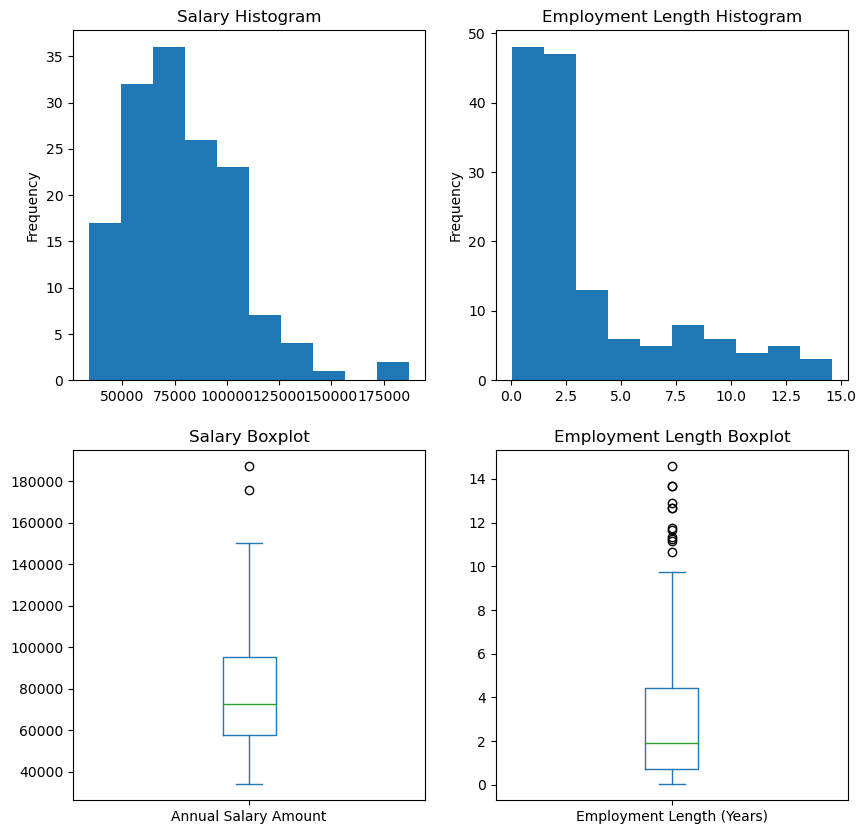

In [7]:
# Salary and Length of Employment Distribution
fig,axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10)) # <- Subplot figure 


#Annual Salary Distribution
fy_24['Annual Salary Amount'].plot(kind = 'hist', title = 'Salary Histogram', ax = axs[0,0]) # <- Salary histogram
fy_24['Employment Length (Years)'].plot(kind = 'hist', title = 'Employment Length Histogram', ax = axs[0,1]) # <- Employment Length Histogram
fy_24['Annual Salary Amount'].plot(kind = 'box', ax = axs[1,0], title = 'Salary Boxplot') # <- Salary Boxplot
fy_24['Employment Length (Years)'].plot(kind = 'box', ax = axs[1,1], title = 'Employment Length Boxplot') # <- Employment Length Boxplot 
plt.show()

Both the Salary and Employment Length histograms both have a right skew which indicates that the mean is higher than the median due to outliers superficially inflating both the average salary amount and employment length at the organization. In addition to the right skew of both histograms, there are several outliers indicated in each boxplot.

In [8]:
#Salary Outliers
Salary_75 = fy_24['Annual Salary Amount'].quantile(0.75) # <- 3rd quartile of salary amount
Salary_25 = fy_24['Annual Salary Amount'].quantile(0.25) # < - 1st quartile of salary amount
Salary_IQR = Salary_75 - Salary_25 # <- Salary interquartile range

Upper_Salary_Outlier = Salary_75 + (Salary_IQR * 1.5) # <- Outlier above 3rd quartile
Lower_Salary_Outlier = Salary_25 - (Salary_IQR * 1.5) # <- Outlier below 1st quartile

print('Employees with a salary greater than or eqaul to',f'${Upper_Salary_Outlier:,}', 'or less than or equal to',f'${Lower_Salary_Outlier:,}','have an Annual Salary Amount that is considered to be an outlier.')

Employees with a salary greater than or eqaul to $151,319.53125 or less than or equal to $1,840.78125 have an Annual Salary Amount that is considered to be an outlier.


In [9]:
#Employment Length Outliers
Emp_Length_75 = fy_24['Employment Length (Years)'].quantile(0.75)# <- 3rd quartile of employment length
Emp_Length_25 = fy_24['Employment Length (Years)'].quantile(0.25)# <- 1st quartile of employment length
Emp_Length_IQR = Emp_Length_75 - Emp_Length_25 # <- Employment length interquartile range

Upper_Emp_Length_Outlier = round(Emp_Length_75 + (Emp_Length_IQR * 1.5),2) # <- Outlier above 3rd quartile
Lower_Emp_Length_Outlier = round(Emp_Length_25 - (Emp_Length_IQR * 1.5),2) # <- Outlier below 1st quartile

print('An outlier is an employee that has been employed for greater than or equal to',Upper_Emp_Length_Outlier,'years.')

An outlier is an employee that has been employed for greater than or equal to 9.91 years.


## Analysis

### 1. What is the typical salary at the charter school network?

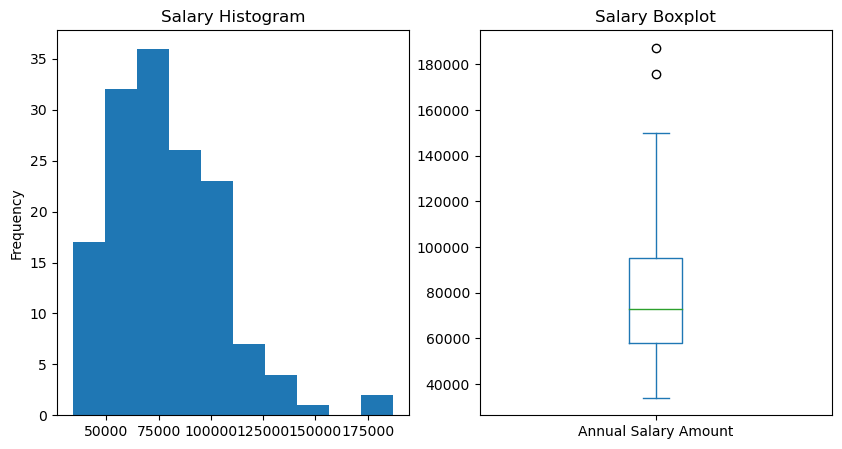

In [10]:
#Visualizing Salary Distribution Data
fig,ax = plt.subplots(nrows = 1, ncols =2, figsize = (10,5))

fy_24['Annual Salary Amount'].plot(kind = 'hist', title = 'Salary Histogram', ax = ax[0]) # <- Salary histogram
fy_24['Annual Salary Amount'].plot(kind = 'box', ax = ax[1], title = 'Salary Boxplot') # <- Salary Boxplot
plt.show()

In [11]:
# Explanation
print('There are',fy_24[(fy_24['Annual Salary Amount'] >= Upper_Salary_Outlier) | (fy_24['Annual Salary Amount']<= Lower_Salary_Outlier)].shape[0],
      'outliers in the dataset. Additionally, there is a right skew in the data as indicated in the histogram above as the outliers are inflating the mean. With that being said, the typical salary is the median salary amount,',
      f"${fy_24['Annual Salary Amount'].median():,}")

There are 2 outliers in the dataset. Additionally, there is a right skew in the data as indicated in the histogram above as the outliers are inflating the mean. With that being said, the typical salary is the median salary amount, $72,875.0


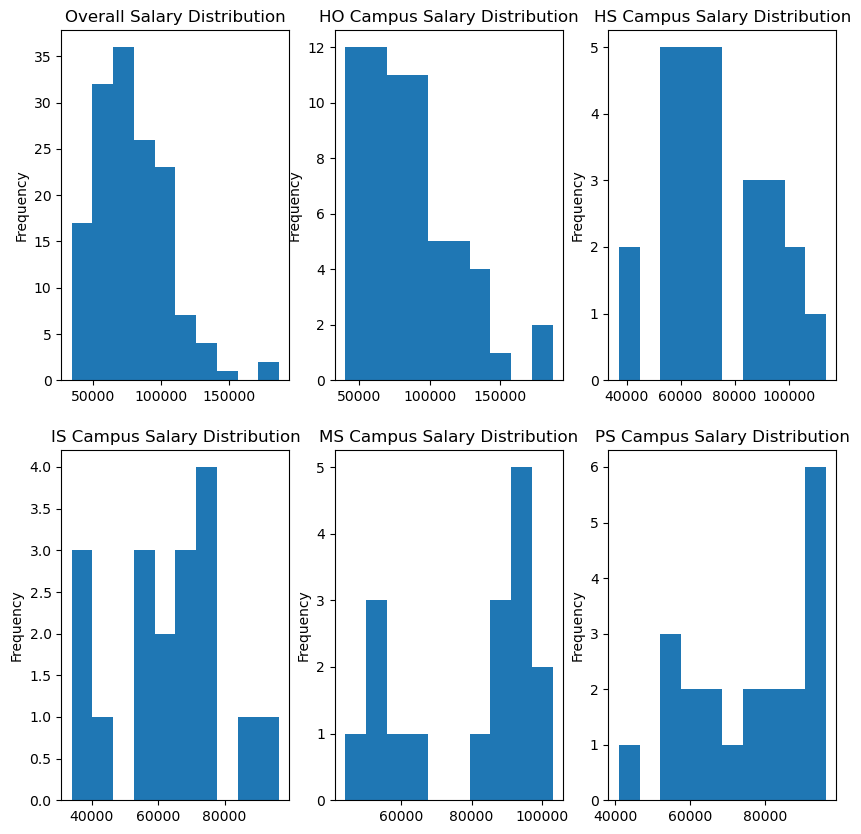

In [12]:
#Visualizing Salary Distribution Data
fig,ax = plt.subplots(nrows = 2, ncols = 3, figsize = (10,10))


fy_24['Annual Salary Amount'].plot(kind = 'hist', title = 'Overall Salary Distribution',ax = ax[0,0]) # <- overall salary distribution
fy_24[fy_24['Campus']== 'HO']['Annual Salary Amount'].plot(kind = 'hist', title = 'HO Campus Salary Distribution',ax = ax[0,1]) # <- HO Campus
fy_24[fy_24['Campus']== 'HS']['Annual Salary Amount'].plot(kind = 'hist', title = 'HS Campus Salary Distribution', ax = ax[0,2]) # <- HS Campus
fy_24[fy_24['Campus']== 'IS']['Annual Salary Amount'].plot(kind = 'hist', title = 'IS Campus Salary Distribution', ax = ax[1,0]) # <- IS Campus 
fy_24[fy_24['Campus']== 'MS']['Annual Salary Amount'].plot(kind = 'hist', title = 'MS Campus Salary Distribution', ax = ax[1,1]) # <- MS Campus
fy_24[fy_24['Campus']== 'PS']['Annual Salary Amount'].plot(kind = 'hist', title = 'PS Campus Salary Distribution', ax = ax[1,2]) # <- PS Campus
plt.show()
                                                           

In [13]:
Salary_Metrics = round(fy_24.groupby('Campus')['Annual Salary Amount'].agg(['mean','median']),2).reset_index()
Salary_Metrics['mean'] = Salary_Metrics['mean'].apply(lambda x: f'$ {x:,}')
Salary_Metrics['median'] = Salary_Metrics['median'].apply(lambda x: f'$ {x:,}')

Salary_Metrics

,Campus,mean,median
0,HO,"$ 84,677.64","$ 74,520.0"
1,HS,"$ 72,990.84","$ 71,637.5"
2,IS,"$ 62,945.46","$ 62,975.0"
3,MS,"$ 79,688.9","$ 86,900.0"
4,PS,"$ 76,028.67","$ 78,100.0"


In [14]:
# Explanation
print('Based on the histograms above there is an uneven distribution of salaries across the network and the median, not the mean, is representative of the typical salary. Overall the typical salary of the network is',
      f"${fy_24['Annual Salary Amount'].median():,}",
      '.The typical salary of HO Campus is',f"${fy_24[fy_24['Campus']=='HO']['Annual Salary Amount'].median():,}",
      '. The typical salary of the HS Campus is',f"${fy_24[fy_24['Campus']=='HS']['Annual Salary Amount'].median():,}",
      '.The typical salary of the IS Campus is',f"${fy_24[fy_24['Campus']=='IS']['Annual Salary Amount'].median():,}",
      '.The typical salary of the MS Campus is',f"${fy_24[fy_24['Campus']=='MS']['Annual Salary Amount'].median():,}",
      '.The typical salary of the PS Campus is',f"${fy_24[fy_24['Campus']=='PS']['Annual Salary Amount'].median():,}",'.')

Based on the histograms above there is an uneven distribution of salaries across the network and the median, not the mean, is representative of the typical salary. Overall the typical salary of the network is $72,875.0 .The typical salary of HO Campus is $74,520.0 . The typical salary of the HS Campus is $71,637.5 .The typical salary of the IS Campus is $62,975.0 .The typical salary of the MS Campus is $86,900.0 .The typical salary of the PS Campus is $78,100.0 .


### 2. What is the typical length of employment?

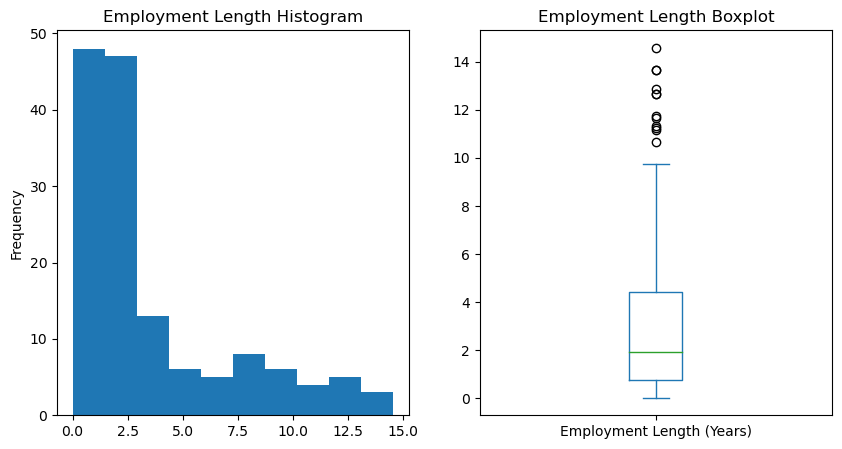

In [15]:
#Visualizing Employment Length Data
fig,ax = plt.subplots(nrows = 1, ncols =2, figsize = (10,5))

fy_24['Employment Length (Years)'].plot(kind = 'hist', title = 'Employment Length Histogram', ax = ax[0]) # <- Salary histogram
fy_24['Employment Length (Years)'].plot(kind = 'box', ax = ax[1], title = 'Employment Length Boxplot') # <- Salary Boxplot
plt.show()

In [16]:
# Explnation
print('There are',fy_24[fy_24['Employment Length (Years)']>= Upper_Emp_Length_Outlier].shape[0],
      'employees that are otuliers as indicated in the boxplot above. Additonally, there is a right skew in the histogram above indicating that majority of the of the employees at the organization have been employed for a short lenght of time.')

There are 12 employees that are otuliers as indicated in the boxplot above. Additonally, there is a right skew in the histogram above indicating that majority of the of the employees at the organization have been employed for a short lenght of time.


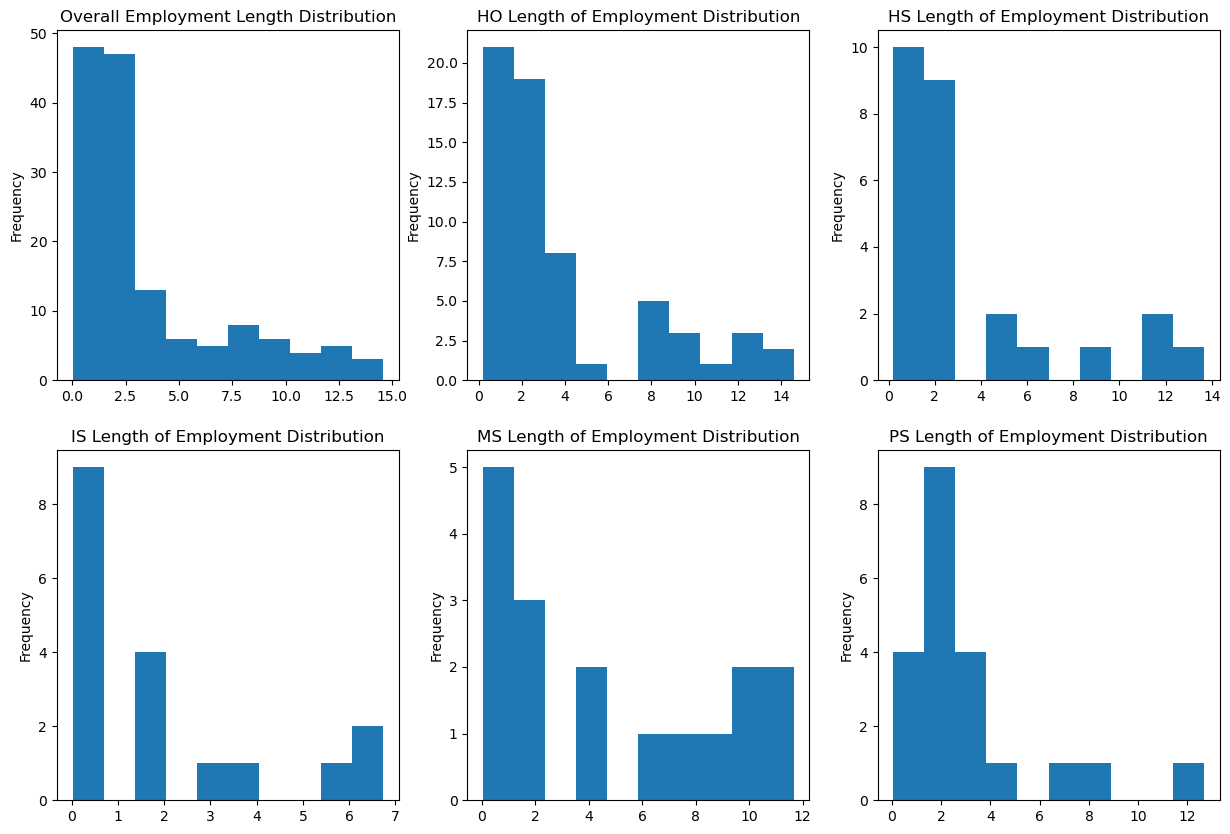

In [17]:
#Visualizing Employment Length Data
fig,ax = plt.subplots(nrows = 2, ncols = 3, figsize = (15,10))


fy_24['Employment Length (Years)'].plot(kind = 'hist', title = 'Overall Employment Length Distribution',ax = ax[0,0]) # <- overall salary distribution
fy_24[fy_24['Campus']== 'HO']['Employment Length (Years)'].plot(kind = 'hist', title = 'HO Length of Employment Distribution',ax = ax[0,1]) # <- HO Campus
fy_24[fy_24['Campus']== 'HS']['Employment Length (Years)'].plot(kind = 'hist', title = 'HS Length of Employment Distribution', ax = ax[0,2]) # <- HS Campus
fy_24[fy_24['Campus']== 'IS']['Employment Length (Years)'].plot(kind = 'hist', title = 'IS Length of Employment Distribution', ax = ax[1,0]) # <- IS Campus 
fy_24[fy_24['Campus']== 'MS']['Employment Length (Years)'].plot(kind = 'hist', title = 'MS Length of Employment Distribution', ax = ax[1,1]) # <- MS Campus
fy_24[fy_24['Campus']== 'PS']['Employment Length (Years)'].plot(kind = 'hist', title = 'PS Length of Employment Distribution', ax = ax[1,2]) # <- PS Campus
plt.show()

In [18]:
#Statistical measure of employment length data
round(fy_24.groupby('Campus')['Employment Length (Years)'].agg(['mean','median']),2)

,mean,median
Campus,,
HO,3.80,2.02
HS,3.31,1.92
IS,1.99,1.16
MS,4.76,3.65
PS,3.04,1.74


In [19]:
# Explanation
print('Based on the histograms above there is an uneven distribution of length of employment across the network and the median, not the mean, is representative of the typical length of employment. Overall the typical length of employment throuhgout the network is',
      fy_24['Employment Length (Years)'].median(),
      'years. The typical length of employment of the HO Campus is',
      fy_24[fy_24['Campus']=='HO']['Employment Length (Years)'].median(),
      'years. The typical length of employment of the HS Campus is',
      fy_24[fy_24['Campus']=='HS']['Employment Length (Years)'].median(),
      'years .The typical length of employment of the IS Campus is',
      fy_24[fy_24['Campus']=='IS']['Employment Length (Years)'].median(),
      'years .The typical length of employment of the MS Campus is',
      fy_24[fy_24['Campus']=='MS']['Employment Length (Years)'].median(),
      'years .The typical length of employment of the PS Campus is',
      fy_24[fy_24['Campus']=='PS']['Employment Length (Years)'].median(),'years.')

Based on the histograms above there is an uneven distribution of length of employment across the network and the median, not the mean, is representative of the typical length of employment. Overall the typical length of employment throuhgout the network is 1.93 years. The typical length of employment of the HO Campus is 2.02 years. The typical length of employment of the HS Campus is 1.92 years .The typical length of employment of the IS Campus is 1.155 years .The typical length of employment of the MS Campus is 3.65 years .The typical length of employment of the PS Campus is 1.74 years.


In [20]:
#Employment Length Tiers
def tiers(x):
    """
    Function creates tiers based on length of employment (years)
    Tier 1 - less than or equal to 1 year 
    Tier 2 - less than or equal to 3 years
    Tier 3 - greater than 3 years
    """
    if x <= 1: # <- Employed less than or equal to a year
        return 'Tier 1'
    elif x <=3: # <- Employed less than or equal to 3 years
        return 'Tier 2'
    elif x > 3: # <- Employed greater than or 3 year
        return 'Tier 3'
fy_24['Employment Length Tiers'] = fy_24['Employment Length (Years)'].apply(lambda x:tiers(x))

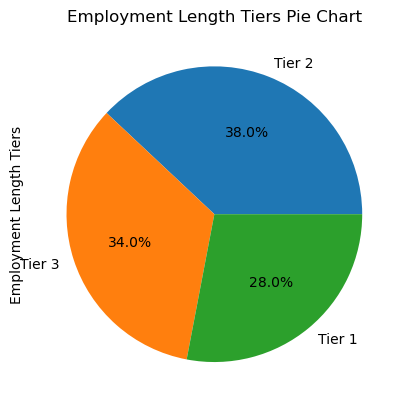

In [21]:
#Employment Length Pie Chart
round(fy_24['Employment Length Tiers'].value_counts(normalize = True),2).plot(kind = 'pie', title = 'Employment Length Tiers Pie Chart',autopct = '%1.1f%%')
plt.show()

Based on the pie chart above, Tier 1 employees account for approximately 28 percent of all employees at the organization, Tier 2 employees account for approximately 38 percent of all employees, and Tier 3 employees account for approximately 34 percent of all employees at the organization.

### 3. Is there an equitable pay scale between school based and Home Office Staff?

There are two types of employees at the organization, school based staff and Home Office staff. School based staff have a 11 month contract while Home Office staff have a 12 month contract. Additionally, school based staff have the opprotunity to earn extra pay while Home Office staff do not. Lastly, Home Office staff work an additional month compared to school based staff.

In [22]:
# Home Office Salary Statistical Metrics
round(fy_24[fy_24['Campus']=='HO']['Annual Salary Amount'].describe(),2)

count        63.00
mean      84677.64
std       33294.49
min       39995.00
25%       58917.38
50%       74520.00
75%      100729.30
max      187250.00
Name: Annual Salary Amount, dtype: float64

In [23]:
#Home Office Staff Salary Distribution
HO_75 = fy_24[fy_24['Campus']=='HO']['Annual Salary Amount'].quantile(0.75) # <- 3rd quartile
HO_25 = fy_24[fy_24['Campus']=='HO']['Annual Salary Amount'].quantile(0.25) # <- 1st quartile
HO_IQR = HO_75 - HO_25 #<- Interquartile range

HO_Upper_Outlier = HO_75 + (1.5 * HO_IQR) # <- Outliers

In [24]:
# Home Office Outliers
fy_24[(fy_24['Campus']=='HO') & (fy_24['Annual Salary Amount']>= HO_Upper_Outlier)]

,Position ID,Legal First Name,Legal Last Name,Annual Salary Amount,Start Date,Campus,Contract Type,Coverage Pay Total,Current Month,Employment Length (Years),Employment Length Tiers
8,33T000063,Sheria,McRae,187250.0,2010-08-02,HO,12.0,NaN,2024-03-31,13.66,Tier 3
172,33T000671,Andre,Moore,175950.0,2023-01-30,HO,12.0,NaN,2024-03-31,1.17,Tier 2


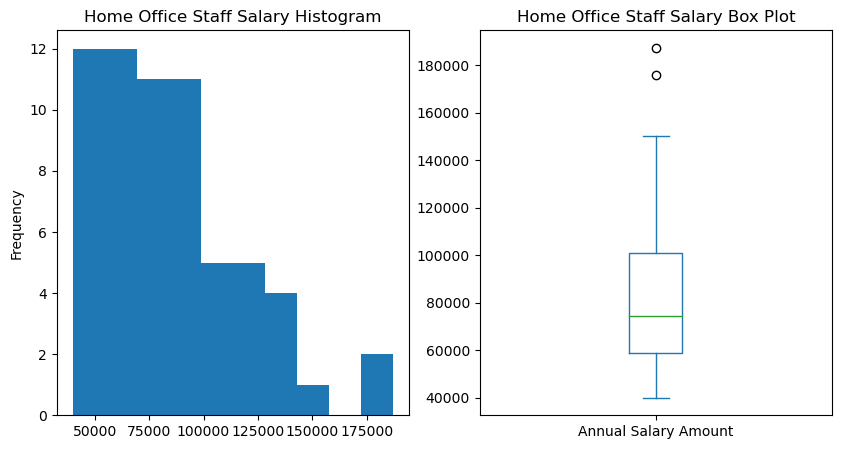

In [25]:
# Visualizing Home Office Staff Salary Data
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))

fy_24[fy_24['Campus']=='HO']['Annual Salary Amount'].plot(kind = 'hist', title = 'Home Office Staff Salary Histogram', ax = ax[0])
fy_24[fy_24['Campus']=='HO']['Annual Salary Amount'].plot(kind = 'box', title = 'Home Office Staff Salary Box Plot', ax = ax[1])
plt.show()

In [26]:
# Explantion
print('There is a right skew in the histrogram indicating that there are several outliers inflating the typical salary amount of Home Office Staff. An outlier is a Home Office staff member that has an Annual Salary Amount greater than or equal to',
      f'${HO_Upper_Outlier:,}',
      'There are',fy_24[(fy_24['Campus']=='HO') & (fy_24['Annual Salary Amount']>= HO_Upper_Outlier)].shape[0],
      'outliers in Home Office. Additionally, the typical value of a Home Office Staff member is based on the median, not mean, which is a value of',
      f"${fy_24[fy_24['Campus']=='HO']['Annual Salary Amount'].median():,}")

There is a right skew in the histrogram indicating that there are several outliers inflating the typical salary amount of Home Office Staff. An outlier is a Home Office staff member that has an Annual Salary Amount greater than or equal to $163,447.1925 There are 2 outliers in Home Office. Additionally, the typical value of a Home Office Staff member is based on the median, not mean, which is a value of $74,520.0


In [27]:
#Filtering out Home Office outliers
HO_fy_24 = fy_24[fy_24['Campus']=='HO']
HO_fy_24 = HO_fy_24[HO_fy_24['Annual Salary Amount']< HO_Upper_Outlier] # <- returning all values not outlier

print('The typical salary of Home Office Staff excluding outliers is',
      f"${HO_fy_24['Annual Salary Amount'].median():,}",
      ',a difference of',f"-${round(fy_24[fy_24['Campus']=='HO']['Annual Salary Amount'].median() - HO_fy_24['Annual Salary Amount'].median(),2):,}",
      'of the median of the Annual Salary Amount including Home Office Outliers')

The typical salary of Home Office Staff excluding outliers is $74,500.0 ,a difference of -$20.0 of the median of the Annual Salary Amount including Home Office Outliers


In [28]:
# Pro Rating Salary 
def pro_rate (row): 
    """
    Function pro rates salaries of 11 month employees to calculate the projected salary 
    if they worked for 12 months.
    """
    if row['Contract Type'] == 11:
        return round((row['Annual Salary Amount']/row['Contract Type']) + row['Annual Salary Amount'],2)
    else:
        return row['Annual Salary Amount']
        
fy_24['Pro Rated Salary'] = fy_24.apply(pro_rate,axis = 1)

In [29]:
# School Based Staff statistical metrics
round(fy_24[~(fy_24['Campus']=='HO')]['Pro Rated Salary'].describe(),2) 

count        85.00
mean      78089.49
std       20073.42
min       37090.91
25%       62100.00
50%       79500.00
75%       94800.00
max      119980.00
Name: Pro Rated Salary, dtype: float64

In [30]:
#School Based Staff Salary Distribution
SB_75 = fy_24[~(fy_24['Campus']=='HO')]['Pro Rated Salary'].quantile(0.75) # <- 3rd quartile
SB_25 = fy_24[~(fy_24['Campus']=='HO')]['Pro Rated Salary'].quantile(0.25) # <- 1st quartile
SB_IQR = SB_75 - SB_25 #<- Interquartile range


SB_Lower_Outlier = SB_25 - (1.5 * SB_IQR)

In [31]:
#School Based Staff Outliers
fy_24[~(fy_24['Campus']=='HO') & (fy_24['Pro Rated Salary']<= SB_Lower_Outlier)]

,Position ID,Legal First Name,Legal Last Name,Annual Salary Amount,Start Date,Campus,Contract Type,Coverage Pay Total,Current Month,Employment Length (Years),Employment Length Tiers,Pro Rated Salary


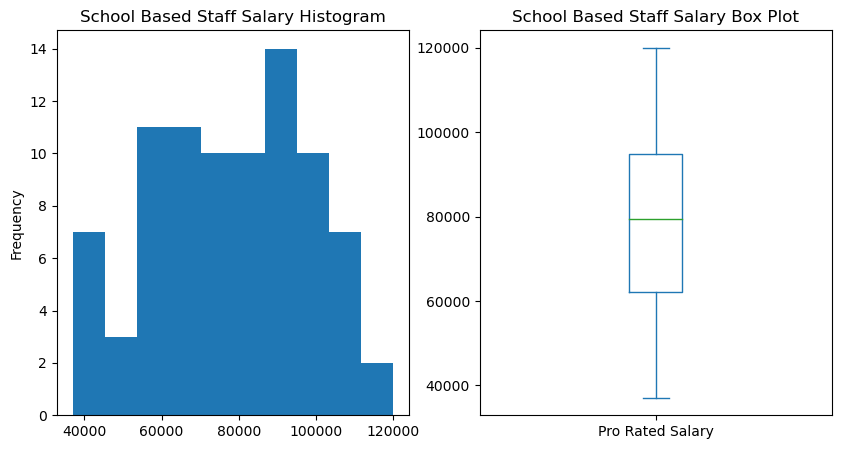

In [32]:
# Visualizing School Based Staff Salary Data
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))


fy_24[~(fy_24['Campus']=='HO')]['Pro Rated Salary'].plot(kind = 'hist',title = 'School Based Staff Salary Histogram', ax = ax[0])
fy_24[~(fy_24['Campus']=='HO')]['Pro Rated Salary'].plot(kind = 'box',title = 'School Based Staff Salary Box Plot', ax = ax[1])
plt.show()

In [33]:
# Explanation
print('There is a bimodal distribution in the histrogram. There is',
      fy_24[~(fy_24['Campus']=='HO') & (fy_24['Pro Rated Salary']<= SB_Lower_Outlier)].shape[0],
      'outlier. An outlier amongst school based staff is an employee that has a Pro Rated Salary Amount less than or eqaul to',
      f"${round(SB_Lower_Outlier,2):,}",
      '. Additionally, the typical Pro Rated Salary Amount of School based staff is',
      f"${round(fy_24[~(fy_24['Campus']=='HO')]['Pro Rated Salary'].median(),2):,}")

There is a bimodal distribution in the histrogram. There is 0 outlier. An outlier amongst school based staff is an employee that has a Pro Rated Salary Amount less than or eqaul to $13,050.0 . Additionally, the typical Pro Rated Salary Amount of School based staff is $79,500.0


In [34]:
#Filtering out School Based Staff Outliers
SB_fy_24 = fy_24[~(fy_24['Campus']=='HO')]
SB_fy_24 = SB_fy_24[SB_fy_24['Pro Rated Salary'] > SB_Lower_Outlier]

# Explnation
print('The typical salary of School Based Staff excluding outliers is',
      f"${SB_fy_24['Pro Rated Salary'].median()}",',an increase of of',
      f"${SB_fy_24['Pro Rated Salary'].median()-fy_24[~(fy_24['Campus']=='HO')]['Pro Rated Salary'].median():,}",
      'from the median including outliers.')

The typical salary of School Based Staff excluding outliers is $79500.0 ,an increase of of $0.0 from the median including outliers.


In [35]:
# Explanation
print('When comparing the typical salaries of school based staff compared to Home Office staff, school based staff earn',
      f"${round(SB_fy_24['Pro Rated Salary'].median()-HO_fy_24['Annual Salary Amount'].median(),2):,}",
      'more than Home Office staff.')

When comparing the typical salaries of school based staff compared to Home Office staff, school based staff earn $5,000.0 more than Home Office staff.


In [36]:
# Coverage Pay Metrics
Coverage_Pay_Sum = fy_24['Coverage Pay Total'].sum() # <- calculating sum of coverage pay for salaried staff

def staff_type (x): # <- creating staff type conditions
    if x == 'HO':
        return 'Home Office Staff'
    else:
        return 'School Based Staff'

fy_24['Staff Type'] = fy_24['Campus'].apply(lambda x: staff_type (x))

Coverage_Pay_Proportion= fy_24.groupby('Staff Type')['Coverage Pay Total'].sum().reset_index()
Coverage_Pay_Proportion['%'] = Coverage_Pay_Proportion['Coverage Pay Total']/Coverage_Pay_Sum
Coverage_Pay_Proportion = Coverage_Pay_Proportion.set_index('Staff Type')


In [37]:
Coverage_Pay_Proportion

,Coverage Pay Total,%
Staff Type,,
Home Office Staff,35161.78,0.210484
School Based Staff,131890.44,0.789516


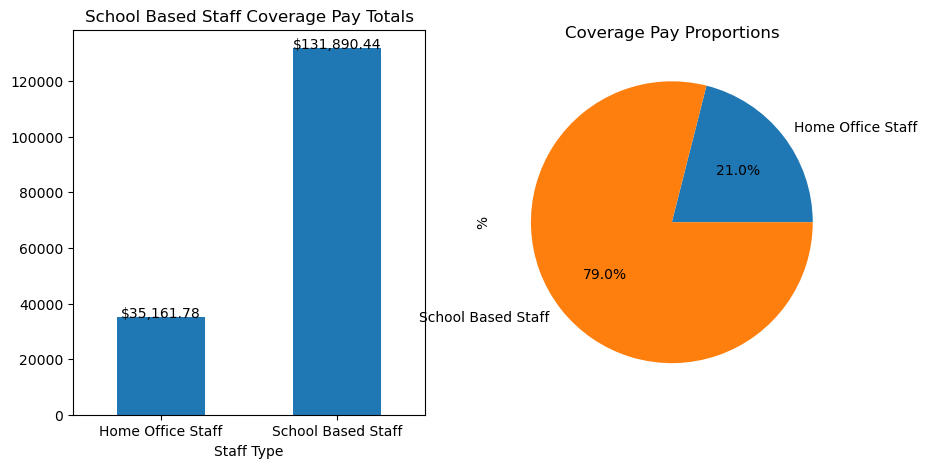

In [38]:
fig,ax = plt.subplots(nrows = 1, ncols =2, figsize = (10,5))

Coverage_Pay_Proportion['Coverage Pay Total'].plot(kind = 'bar', ax = ax [0], title = 'School Based Staff Coverage Pay Totals', rot  = 0)
Coverage_Pay_Proportion['%'].plot(kind = 'pie', title = 'Coverage Pay Proportions',autopct = '%1.1f%%', ax = ax[1])

for index,value in enumerate (Coverage_Pay_Proportion['Coverage Pay Total']):
    formatted_value = "${:,}".format(value) # <- adds thousands separator
    ax[0].text(index,value,str(formatted_value), ha = 'center')

In [39]:
#Explnation
print('In total salaried staff members have been paid',
      f"${Coverage_Pay_Sum:,}",'in coverage pay. Home Office Staff have received',
      f"${Coverage_Pay_Proportion['Coverage Pay Total'].iloc[0]:,}",'approximately',
      f"{Coverage_Pay_Proportion['%'].iloc[0]:.1%}",
      'of total coverage pay. In contrast, School Based Staff have received',
      f"${Coverage_Pay_Proportion['Coverage Pay Total'].iloc[1]:,}",'approximately',
      f"{Coverage_Pay_Proportion['%'].iloc[1]:.1%}",'of total coverage pay, a difference of',
      f"${round(Coverage_Pay_Proportion['Coverage Pay Total'].iloc[1]-Coverage_Pay_Proportion['Coverage Pay Total'].iloc[0],2):,}")

In total salaried staff members have been paid $167,052.22 in coverage pay. Home Office Staff have received $35,161.78 approximately 21.0% of total coverage pay. In contrast, School Based Staff have received $131,890.44 approximately 79.0% of total coverage pay, a difference of $96,728.66


In [40]:
# Coverage Pay Statistical Metrics
round(fy_24['Coverage Pay Total'].describe(),2)

count      90.00
mean     1856.14
std      2379.64
min        25.00
25%       167.50
50%       621.07
75%      2617.50
max      8216.22
Name: Coverage Pay Total, dtype: float64

In [41]:
# Staff Type Statistical Metrics
round(fy_24.groupby('Staff Type')['Coverage Pay Total'].describe(),2).transpose()

Staff Type,Home Office Staff,School Based Staff
count,22.00,68.00
mean,1598.26,1939.57
std,2084.24,2476.21
min,25.00,30.00
25%,113.75,213.44
50%,817.50,552.50
75%,2126.25,2994.99
max,7880.00,8216.22


In [42]:
fy_24['Staff Type'].unique()

array(['Home Office Staff', 'School Based Staff'], dtype=object)

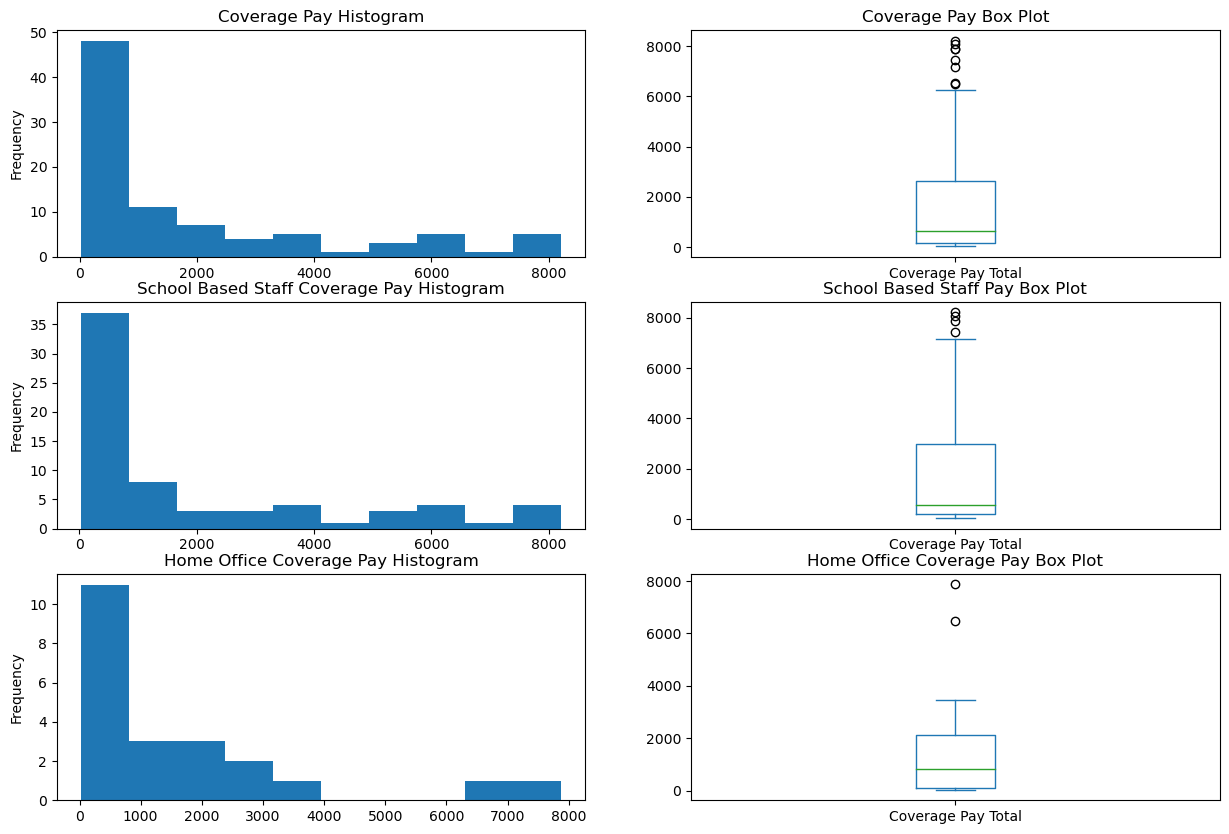

In [43]:
# Coverage Pay Distribution
fig, ax = plt.subplots(nrows = 3, ncols =2, figsize = (15,10))
fy_24['Coverage Pay Total'].plot(kind = 'hist',title = 'Coverage Pay Histogram', ax = ax[0,0])
fy_24['Coverage Pay Total'].plot(kind = 'box', title = 'Coverage Pay Box Plot',ax = ax[0,1])
fy_24[fy_24['Staff Type']=='School Based Staff']['Coverage Pay Total'].plot(kind = 'hist', title = 'School Based Staff Coverage Pay Histogram',ax = ax[1,0])
fy_24[fy_24['Staff Type']=='School Based Staff']['Coverage Pay Total'].plot(kind = 'box', title = 'School Based Staff Pay Box Plot',ax = ax[1,1])
fy_24[fy_24['Staff Type']=='Home Office Staff']['Coverage Pay Total'].plot(kind = 'hist', title = 'Home Office Coverage Pay Histogram',ax = ax[2,0])
fy_24[fy_24['Staff Type']=='Home Office Staff']['Coverage Pay Total'].plot(kind = 'box', title = 'Home Office Coverage Pay Box Plot',ax = ax[2,1])
plt.show()

There is right skew in the coverage pay across the overall organization as well as staff types.

In [44]:
# Overall Coverage Pay Outliers
coverage_pay_75 = fy_24['Coverage Pay Total'].quantile(0.75)
coverage_pay_25 = fy_24['Coverage Pay Total'].quantile(0.25)
coverage_pay_IQR = coverage_pay_75 - coverage_pay_25

coverage_pay_outlier_upper = coverage_pay_75 + (1.5 * coverage_pay_IQR)

# School Based Staff Coverage Pay Outliers
SB_coverage_pay_75 = fy_24[fy_24['Staff Type']=='School Based Staff']['Coverage Pay Total'].quantile(0.75)
SB_coverage_pay_25 = fy_24[fy_24['Staff Type']=='School Based Staff']['Coverage Pay Total'].quantile(0.25)
SB_coverage_pay_IQR = SB_coverage_pay_75 - SB_coverage_pay_25

SB_coverage_pay_outlier_upper = round(SB_coverage_pay_75 + (1.5 * SB_coverage_pay_IQR),2)

# Home Office Staff Outliers
HO_coverage_pay_75 = fy_24[fy_24['Staff Type']=='Home Office Staff']['Coverage Pay Total'].quantile(0.75)
HO_coverage_pay_25 = fy_24[fy_24['Staff Type']=='Home Office Staff']['Coverage Pay Total'].quantile(0.25)
HO_coverage_pay_IQR = HO_coverage_pay_75 - HO_coverage_pay_25

HO_coverage_pay_outlier_upper = round(HO_coverage_pay_75 + (1.5 * HO_coverage_pay_IQR),2)

# Explanation
print('Overall, the typical coverage pay amount is',
      f"${round(fy_24['Coverage Pay Total'].median(),2)}",
      '. Employees that have received greater than or equal to',
      f"${coverage_pay_outlier_upper:,}",
      'throughout the organization are considered to be outliers. Overall, there are',
      fy_24[fy_24['Coverage Pay Total']>= coverage_pay_outlier_upper].shape[0],
      'employees that have received greater than or equal to',
      f"${coverage_pay_outlier_upper:,}",
      'in the dataset. School Based Staff have a typical coverage amount of',
      f"${fy_24[fy_24['Staff Type']=='School Based Staff']['Coverage Pay Total'].median()}",
      '. An outlier for amongst school based staff is a school based staff member that received greater than or eqaul to',
      f"${SB_coverage_pay_outlier_upper:,}",
      '. There are',
      fy_24[(fy_24['Staff Type']=='School Based Staff') & (fy_24['Coverage Pay Total']>=SB_coverage_pay_outlier_upper)].shape[0],
      'school based staff that are considered outliers. Home Office Staff have a typical coverage pay amount of',
      f"${fy_24[fy_24['Staff Type']=='Home Office Staff']['Coverage Pay Total'].median():,}",
      'An outlier amongst the Home Office staff is a staff member that has received greater than or equal to',
      f"${HO_coverage_pay_outlier_upper:,}",
      'There are',
      fy_24[(fy_24['Staff Type']=='Home Office Staff') & (fy_24['Coverage Pay Total']>=HO_coverage_pay_outlier_upper)].shape[0],
      'Home Office staff coverage pay outliers.')

Overall, the typical coverage pay amount is $621.07 . Employees that have received greater than or equal to $6,292.5 throughout the organization are considered to be outliers. Overall, there are 8 employees that have received greater than or equal to $6,292.5 in the dataset. School Based Staff have a typical coverage amount of $552.5 . An outlier for amongst school based staff is a school based staff member that received greater than or eqaul to $7,167.32 . There are 4 school based staff that are considered outliers. Home Office Staff have a typical coverage pay amount of $817.5 An outlier amongst the Home Office staff is a staff member that has received greater than or equal to $5,145.0 There are 2 Home Office staff coverage pay outliers.


In [45]:
# Coverage Pay Outliers
coverage_pay_outliers = fy_24[fy_24['Coverage Pay Total']>= coverage_pay_outlier_upper][['Legal First Name','Legal Last Name','Pro Rated Salary','Coverage Pay Total','Staff Type']]
coverage_pay_outliers['Pro Rated Salary'] = coverage_pay_outliers['Pro Rated Salary'].apply(lambda x: f'${x:,}')
coverage_pay_outliers['Coverage Pay Total'] = coverage_pay_outliers['Coverage Pay Total'].apply(lambda x: f'${x:,}')
coverage_pay_outliers.sort_values(by = 'Coverage Pay Total', ascending = False)

,Legal First Name,Legal Last Name,Pro Rated Salary,Coverage Pay Total,Staff Type
103,Margarita,Medina,"$68,760.0","$8,216.22",School Based Staff
58,Summiya,Abdul-Quddus,"$88,320.0","$8,085.0",School Based Staff
19,Vianney,Anzures,"$94,800.0","$7,880.0",School Based Staff
59,Danae',Williams,"$64,750.0","$7,880.0",Home Office Staff
15,Alice,Lubrano-Weiss,"$105,151.64","$7,425.63",School Based Staff
53,Jessica,Yentema,"$82,320.0","$7,145.0",School Based Staff
50,Denise,Bembry,"$82,320.0","$6,545.0",School Based Staff
74,Courtney,Agyeman,"$89,008.97","$6,471.05",Home Office Staff


In [46]:
# School Based Coverage Pay Outliers
sb_coverage_pay_outliers = fy_24[(fy_24['Staff Type']=='School Based Staff') & (fy_24['Coverage Pay Total']>=SB_coverage_pay_outlier_upper)][['Legal First Name','Legal Last Name','Pro Rated Salary','Coverage Pay Total','Staff Type']]
sb_coverage_pay_outliers['Pro Rated Salary'] = sb_coverage_pay_outliers['Pro Rated Salary'].apply(lambda x: f'${x:,}')
sb_coverage_pay_outliers['Coverage Pay Total'] = sb_coverage_pay_outliers['Coverage Pay Total'].apply(lambda x: f'${x:,}')
sb_coverage_pay_outliers.sort_values(by = 'Coverage Pay Total', ascending = False)

,Legal First Name,Legal Last Name,Pro Rated Salary,Coverage Pay Total,Staff Type
103,Margarita,Medina,"$68,760.0","$8,216.22",School Based Staff
58,Summiya,Abdul-Quddus,"$88,320.0","$8,085.0",School Based Staff
19,Vianney,Anzures,"$94,800.0","$7,880.0",School Based Staff
15,Alice,Lubrano-Weiss,"$105,151.64","$7,425.63",School Based Staff


In [47]:
# Home Office Coverage Pay Outliers
# School Based Coverage Pay Outliers
ho_coverage_pay_outliers = fy_24[(fy_24['Staff Type']=='Home Office Staff') & (fy_24['Coverage Pay Total']>=HO_coverage_pay_outlier_upper )][['Legal First Name','Legal Last Name','Pro Rated Salary','Coverage Pay Total','Staff Type']]
ho_coverage_pay_outliers['Pro Rated Salary'] = ho_coverage_pay_outliers['Pro Rated Salary'].apply(lambda x: f'${x:,}')
ho_coverage_pay_outliers['Coverage Pay Total'] = ho_coverage_pay_outliers['Coverage Pay Total'].apply(lambda x: f'${x:,}')
ho_coverage_pay_outliers.sort_values(by = 'Coverage Pay Total', ascending = False)

,Legal First Name,Legal Last Name,Pro Rated Salary,Coverage Pay Total,Staff Type
59,Danae',Williams,"$64,750.0","$7,880.0",Home Office Staff
74,Courtney,Agyeman,"$89,008.97","$6,471.05",Home Office Staff


In [48]:
# Creating Adjusted Salary Column

"""
Adjusted Salary Accounts for Pro Rated Salary + Typical Coverage Pay Amount
"""
sb_typical_coverage_pay = fy_24[fy_24['Staff Type']=='School Based Staff']['Coverage Pay Total'].median()
ho_typical_coverage_pay = fy_24[fy_24['Staff Type']=='Home Office Staff']['Coverage Pay Total'].median()

def adjusted_salary(row):
    if row['Staff Type']=='School Based Staff':
        return row['Pro Rated Salary'] + sb_typical_coverage_pay
    elif row ['Staff Type'] == 'Home Office Staff':
        return row['Pro Rated Salary'] + ho_typical_coverage_pay
    
fy_24['Adjusted Salary'] = fy_24.apply(adjusted_salary, axis = 1)



In [49]:
HO_Staff_Typical_Salary = HO_fy_24['Annual Salary Amount'].median()
SB_Staff_Typical_Salary = SB_fy_24['Pro Rated Salary'].median()
HO_Staff_Adjusted_Salary = HO_Staff_Typical_Salary + ho_typical_coverage_pay
SB_Staff_Adjusted_Salary = SB_Staff_Typical_Salary + sb_typical_coverage_pay


print('Overall, Home Office staff have a tpyical adjusted salary of',f"${HO_Staff_Adjusted_Salary:,}",
     'and school based staff have a typical adjusted salary of',f"${SB_Staff_Adjusted_Salary:,}",'an overall difference of',
     f"${round(SB_Staff_Adjusted_Salary-HO_Staff_Adjusted_Salary,2):,}")

Overall, Home Office staff have a tpyical adjusted salary of $75,317.5 and school based staff have a typical adjusted salary of $80,052.5 an overall difference of $4,735.0
